['./Maps\\Correct Map 1_page-0001.jpg', './Maps\\Correct Map 2_page-0001.jpg', './Maps\\Correct Map 3_page-0001.jpg', './Maps\\Correct Map 4_page-0001.jpg', './Maps\\Correct Map 5_page-0001.jpg', './Maps\\Correct Map 6_page-0001.jpg']


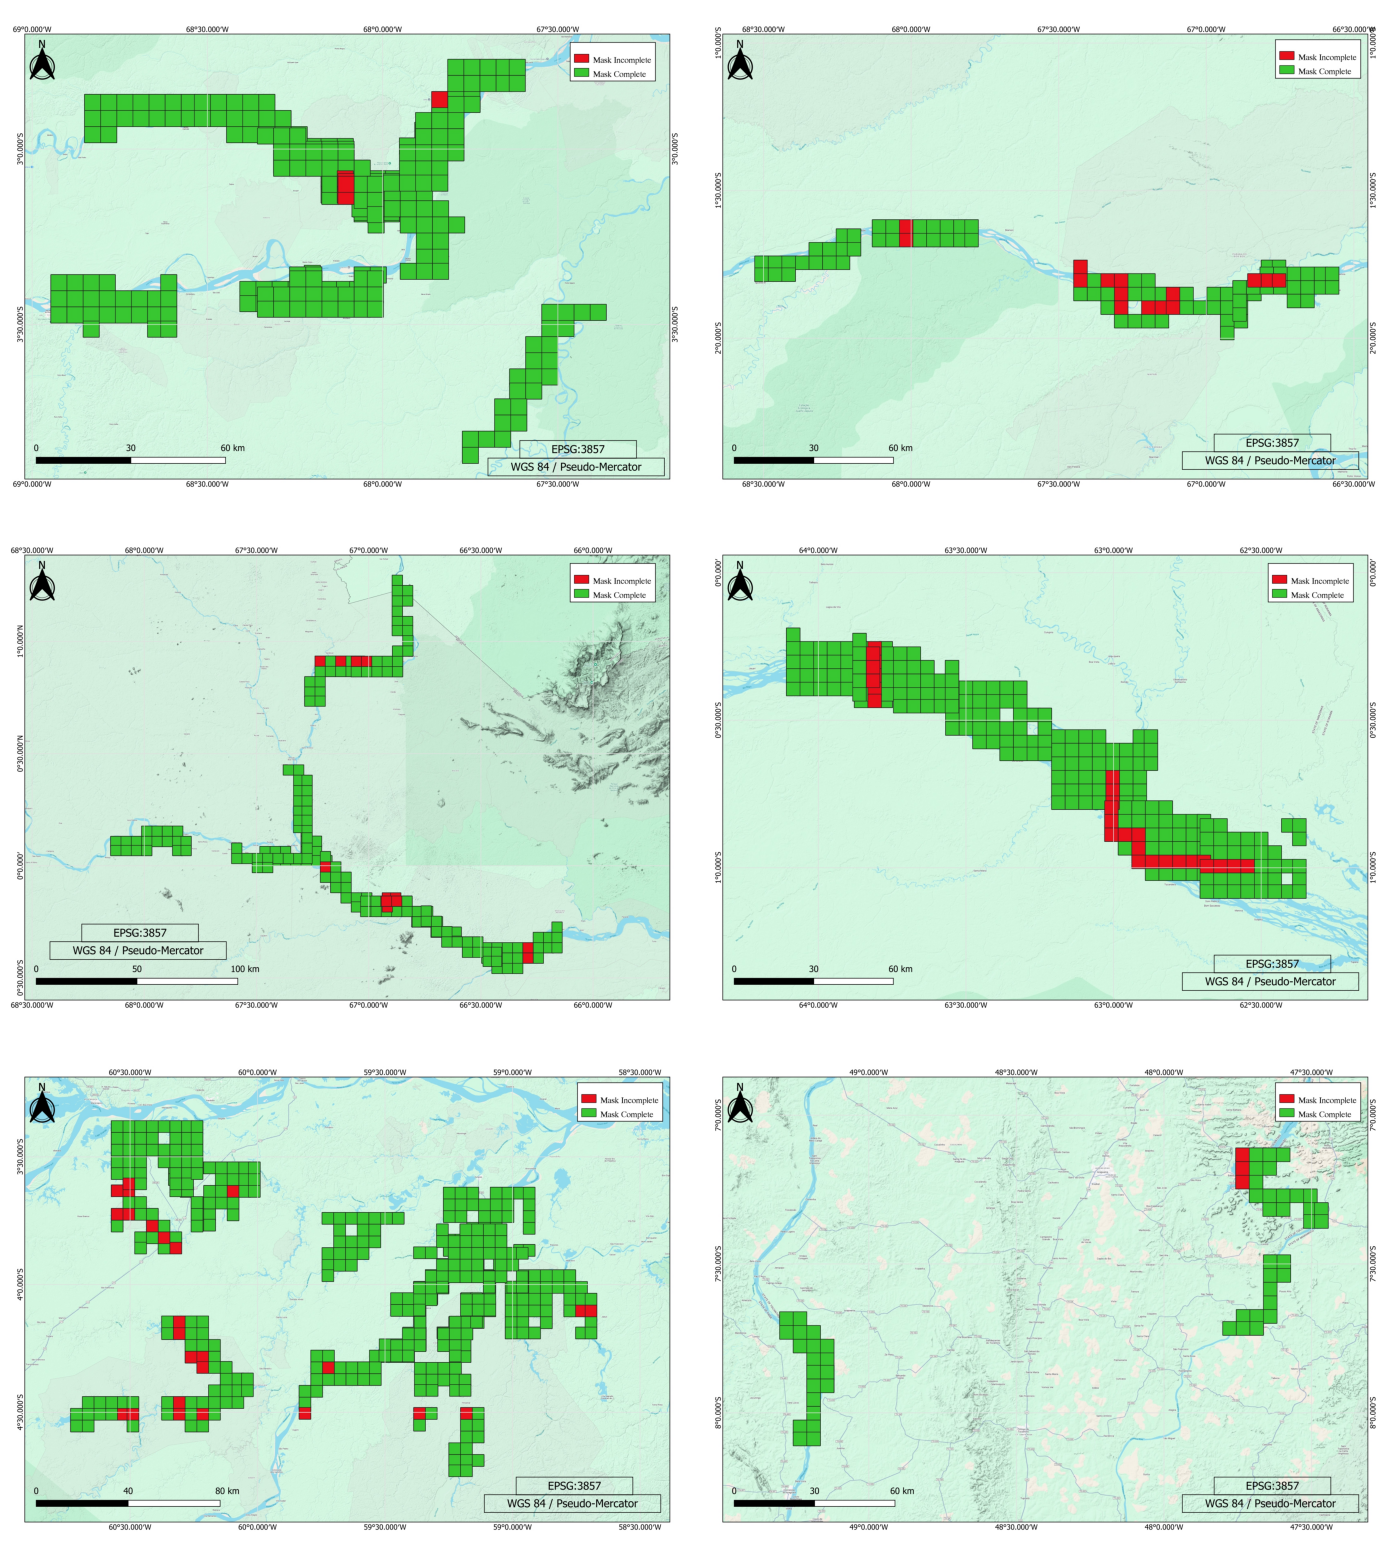

In [1]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
# Get all PDF files\n
jpg_files = glob.glob('./Maps/Correct *.jpg')
print(jpg_files)

# Set up subplot

fig, axes = plt.subplots(3, len(jpg_files)//3, figsize=(18, 20))
axes = axes.flatten()

i=0
for image_file in jpg_files:
    image = Image.open(image_file)
    axes[i].imshow(image)
    axes[i].axis('off')
    i+=1

plt.subplots_adjust(wspace=0, hspace=0.05)
plt.savefig(f"./Maps/Correct_Regions.jpg", bbox_inches='tight', pad_inches=0.1)
plt.show()

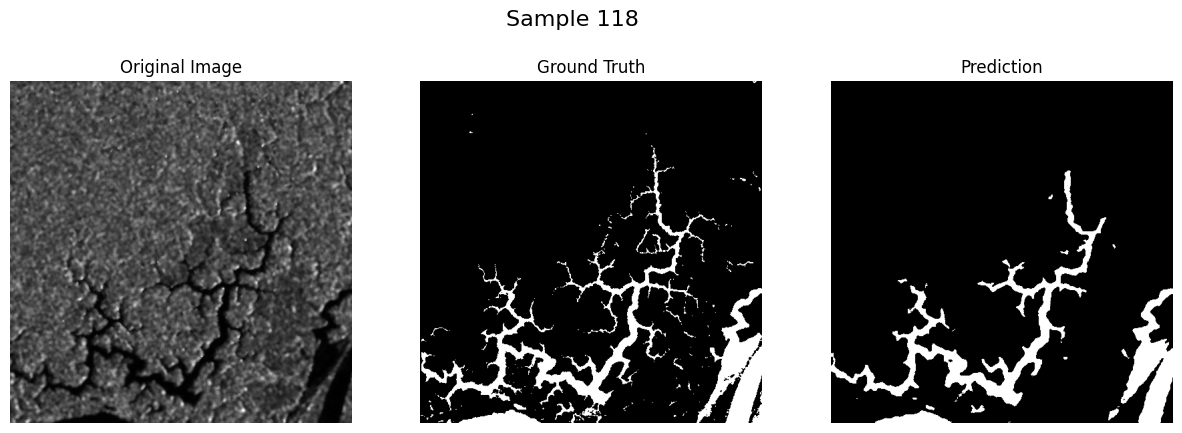

In [4]:
import tifffile as tiff

def visualize(image, mask, pred, idx, name):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Sample {idx}', fontsize=16)

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Ground Truth')
    axes[1].axis('off')

    axes[2].imshow(pred, cmap='gray')
    axes[2].set_title('Prediction')
    axes[2].axis('off')

    plt.savefig(name, bbox_inches='tight')
    plt.show()
    
number = "353"
image = tiff.imread(f"./data_new/{number}.tif")
mask = tiff.imread(f"./GEE_Masks/GEE_resized/test_gee/NDWI_Mask_{number}_resized.tif")
pred = tiff.imread(f"./GEE_Output/Adversarial/New_20_Epoch_0_with_diff_kernels/dense_{number}.tif")

visualize(image[0], mask, pred, 118, f"{number}.png")